# Data Gathering: 
## Wikipedia Page Views Trends of Major Cryptocurrencies
##                  +
## Bitcoin Price Data from Yahoo finance


<!DOCTYPE html>
<html>
<head>
    <title> </title>
</head>
<body>
    <div style="display: flex;">
        <img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/80/Wikipedia-logo-v2.svg/1024px-Wikipedia-logo-v2.svg.png" alt="Image 1" style="width: 30%; height: auto;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/8/8f/Yahoo%21_Finance_logo_2021.png" alt="Image 2" style="width: 50%; height: auto;">
    </div>
</body>
</html>

### Importing Relevant Libraries

In [1]:
import pandas as pd
from urllib.request import urlopen # For Python 3.0 and later
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

c:\Users\apsin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Gathering: Page View Trends of Dogecoin Wikipedia Article 

<!DOCTYPE html>
<html>
<head>
    <title>  </title>
</head>
<body>
    <div style="display: flex;">
        <img src="https://upload.wikimedia.org/wikipedia/en/d/d0/Dogecoin_Logo.png" alt="Image 1" style="width: 20%; height: auto;">
        <img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/80/Wikipedia-logo-v2.svg/1024px-Wikipedia-logo-v2.svg.png" alt="Image 2" style="width: 20%; height: auto;">
    </div>
</body>
</html>

In [2]:
# Define the Wikipedia page title for the cryptocurrency of interest
page_title = "Dogecoin"

# Define the time range for page view statistics
start_date = "20220101"  # YYYYMMDD
end_date = "20221001"

# Construct the API URL
api_url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{page_title}/daily/{start_date}/{end_date}"

response = urlopen(api_url)
decoded_data = response.read().decode("utf-8")
data_dict_fromJson= json.loads(decoded_data) #dictionary
df= pd.DataFrame(data_dict_fromJson['items'])

# Create a DataFrame from the extracted data
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H')

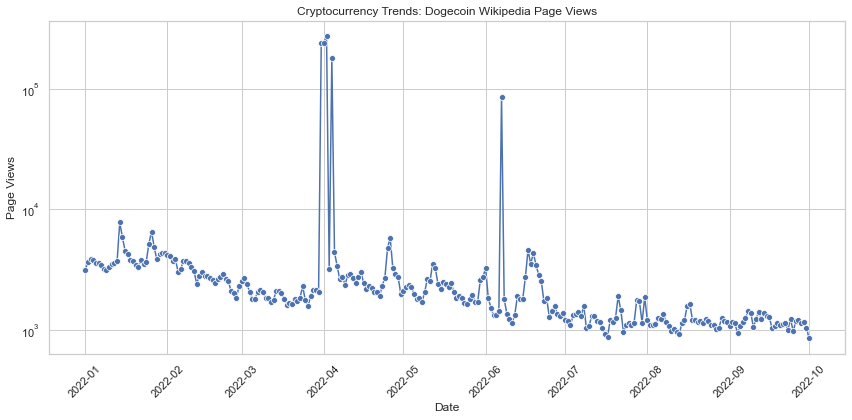

In [3]:
# Plot Dogecoin wiki page view trends based on Wikipedia page views

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Use Seaborn's lineplot for the plot
sns.lineplot(data=df, x="timestamp", y="views", marker='o', color='b')

# Set the plot title and labels
plt.title(f"Cryptocurrency Trends: {page_title} Wikipedia Page Views")
plt.xlabel("Date")
plt.ylabel("Page Views")

# Set the y-axis to a log scale to visualize large variations in page view trends better
plt.yscale("log") 

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [4]:
df.head()

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Dogecoin,daily,2022-01-01,all-access,all-agents,3123
1,en.wikipedia,Dogecoin,daily,2022-01-02,all-access,all-agents,3675
2,en.wikipedia,Dogecoin,daily,2022-01-03,all-access,all-agents,3895
3,en.wikipedia,Dogecoin,daily,2022-01-04,all-access,all-agents,3840
4,en.wikipedia,Dogecoin,daily,2022-01-05,all-access,all-agents,3579


### Data Gathering: Relatively Longer Term and Popular Crypto
- Long term and dominant crypto present in market since Jan 2018 are chosen to capture
    - Allows us to capture 2 bearish markets (Jan 2018 to Feb 2019 and Nov 2021 to March 2023), and 1 bullish market cycle (March 2019 to Oct 2021)  
- Qualifying cryptos: Bitcoin, Ethereum, Litecoin, and the meme coin: Dogecoin
- Page views of the two largest crypto exchanges: Binance and Coinbase


<!DOCTYPE html>
<html>
<head>
    <title> </title>
</head>
<body>
    <div style="display: flex;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Bitcoin.svg" alt="Image 1" style="width: 12%; height: auto;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/d/d0/Eth-diamond-rainbow.png" alt="Image 2" style="width: 12%; height: auto;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/2/24/6_Full_Logo_S-2.png" alt="Image 3" style="width: 40%; height: auto;">
        <img src="https://upload.wikimedia.org/wikipedia/en/d/d0/Dogecoin_Logo.png" alt="Image 4" style="width: 12%; height: auto;">
     </div>
</body>
</html>


In [5]:
listOfCryptoWikiPageTitles= ['Bitcoin','Ethereum','Litecoin','Dogecoin','Binance','Coinbase']

# Define the time range for page view statistics
start_date = "20180101"  # YYYYMMDD
end_date = datetime.today().strftime("%Y%m%d") # Get today's date

listOfDataFrames= []

for page_title in listOfCryptoWikiPageTitles:

    # Construct the API URL
    api_url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{page_title}/daily/{start_date}/{end_date}"
    
    selected_df= pd.DataFrame()
    response = urlopen(api_url)    
    selected_df= pd.DataFrame(json.loads(response.read().decode("utf-8"))['items'])
    selected_df.drop(columns= ['project','article','granularity','access','agent'], axis= 1, inplace=True) # dropping columns that provide no info of value
    
    selected_df.rename(columns={'views': page_title + '_views', 'timestamp': 'date'}, inplace=True) # renaming columns views -> crypto name + views
    selected_df['date']= pd.to_datetime(selected_df['date'], format='%Y%m%d%H').dt.date

    listOfDataFrames.append(selected_df) # appending each of dataframe corresponding to a crypto/exchange wikipage to a list


df_wikiViews= listOfDataFrames[0] # the first dataframe in the list
for df in listOfDataFrames[1:]:
    df_wikiViews= pd.merge(df_wikiViews, df, on='date', how='left')

In [6]:
df_wikiViews.head()

,date,Bitcoin_views,Ethereum_views,Litecoin_views,Dogecoin_views,Binance_views,Coinbase_views
0,2018-01-01,66949,6804,3340,4368,NaN,3660
1,2018-01-02,90271,11524,5256,6648,NaN,5535
2,2018-01-03,99223,12196,5850,7881,NaN,6699
3,2018-01-04,88224,13717,6462,9429,NaN,7872
4,2018-01-05,81601,12743,5125,11074,NaN,7134


In [7]:
# Only first 2 months of data for binance is empty likely because binance was just founded on July 2017 so lets backward fill it
df_wikiViews = df_wikiViews.fillna(method='bfill')

In [8]:
df_wikiViews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2112
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2113 non-null   object 
 1   Bitcoin_views   2113 non-null   int64  
 2   Ethereum_views  2113 non-null   int64  
 3   Litecoin_views  2113 non-null   int64  
 4   Dogecoin_views  2113 non-null   int64  
 5   Binance_views   2113 non-null   float64
 6   Coinbase_views  2113 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 132.1+ KB


In [9]:
# Binance_views is assigned float because it had NaN values so after backward filling, it can be converted to int64 datatype
df_wikiViews['Binance_views'] = df_wikiViews['Binance_views'].astype('int64')

In [10]:
views_columns= df_wikiViews.select_dtypes(exclude=['object']).columns.to_list()
views_columns

['Bitcoin_views',
 'Ethereum_views',
 'Litecoin_views',
 'Dogecoin_views',
 'Binance_views',
 'Coinbase_views']

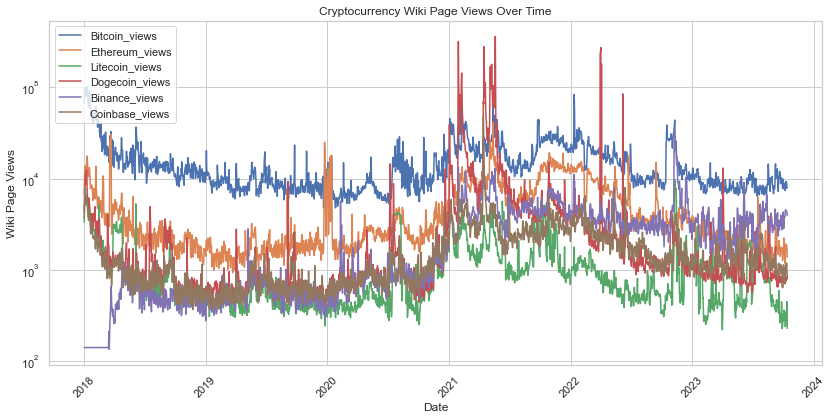

In [11]:
# Create line plots for each cryptocurrency view
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the trends for each cryptocurrency
for column in views_columns:
    sns.lineplot(data=df_wikiViews, x='date', y=column, label=column)

plt.title("Cryptocurrency Wiki Page Views Over Time")
plt.xlabel("Date")
plt.ylabel("Wiki Page Views")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.tight_layout()
plt.yscale("log") 

# Display the plot
plt.show()

### Data Gathering: Bitcoin Price Data From Yahoo! Finance
- Go to this url: https://finance.yahoo.com/quote/BTC-USD/history/
- Copy the link address associated with the Download button as shown in the screenshot below

<img width="900" src="https://raw.githubusercontent.com/apsinghAnalytics/WikiViewsCryptoPriceTrendAnalysis/main/YahooFinanceLink.jpg">


An example of the copied url is given below:
- https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1665902478&period2=1697438478&interval=1d&events=history&includeAdjustedClose=true


The period1 and period2 are in **Unix time** format, which represents the number of seconds that have passed since the Unix epoch, which is defined as January 1, 1970, at 00:00:00 UTC. So, regular date format needs to be converted to this format in order to request the query from Yahoo! Finance

In [12]:
# converting the start_date and end_date defined previously to Unix time

date_format = "%Y%m%d" # the start_date and end_date defined previously are in string format "20180101"

start_time = int(datetime.strptime(start_date, date_format).timestamp())
end_time = int(datetime.strptime(end_date, date_format).timestamp())
print("start date in Unix time:",start_time)
print("end date in Unix time:",end_time)

start date in Unix time: 1514793600
end date in Unix time: 1697353200


In [13]:
# Because the url link to obtain Bitcoin price data oints to downloading a csv file, the StringIO library is used
# This library is used to create an in-memory file-like object that allows you to treat a string as a file 

from io import StringIO 

url =f"https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1={str(start_time)}&period2={str(end_time)}&interval=1d&events=history&includeAdjustedClose=true"

response = urlopen(url)
decoded_data = response.read().decode("utf-8")
csv_data= StringIO(decoded_data)

df_btc= pd.read_csv(csv_data)


In [14]:
df_btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,1.029120e+10
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,1.684660e+10
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,1.687190e+10
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,2.178320e+10
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,2.384090e+10


In [15]:
df_btc= df_btc[['Date','Close','Volume']] # dropping all the other columns

In [16]:
# Rename columns in the DataFrameb
df_btc = df_btc.rename(columns={'Date': 'date', 'Close': 'BTC_Close', 'Volume': 'BTC_Volume'})

In [17]:
df_btc['date']= pd.to_datetime(df_btc['date']).dt.date # converting to date format

In [18]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2114 non-null   object 
 1   BTC_Close   2113 non-null   float64
 2   BTC_Volume  2113 non-null   float64
dtypes: float64(2), object(1)
memory usage: 49.7+ KB


### Combining Wiki Page Views Data and the Bitcoin Price Data 

In [19]:
df_agg= pd.merge(df_wikiViews,df_btc, on='date',how='inner')

In [20]:
df_agg.head()

,date,Bitcoin_views,Ethereum_views,Litecoin_views,Dogecoin_views,Binance_views,Coinbase_views,BTC_Close,BTC_Volume
0,2018-01-01,66949,6804,3340,4368,141,3660,13657.200195,1.029120e+10
1,2018-01-02,90271,11524,5256,6648,141,5535,14982.099609,1.684660e+10
2,2018-01-03,99223,12196,5850,7881,141,6699,15201.000000,1.687190e+10
3,2018-01-04,88224,13717,6462,9429,141,7872,15599.200195,2.178320e+10
4,2018-01-05,81601,12743,5125,11074,141,7134,17429.500000,2.384090e+10


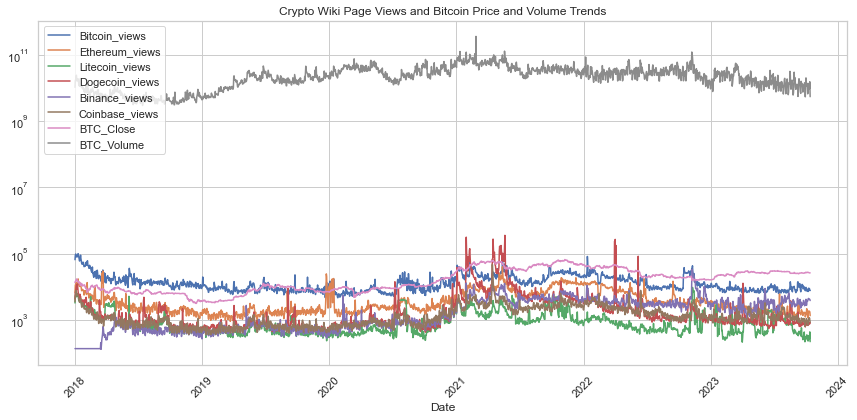

In [24]:
# Create line plots for each cryptocurrency view
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(12, 6))  # Set the figure size

plot_columns= df_agg.select_dtypes(exclude=['object']).columns.to_list()

# Plot the trends for each cryptocurrency
for column in plot_columns:
    sns.lineplot(data=df_agg, x='date', y=column, label=column)

plt.title("Crypto Wiki Page Views and Bitcoin Price and Volume Trends")
plt.xlabel("Date")
plt.ylabel("")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.tight_layout()
plt.yscale("log") 

# Display the plot
plt.show()

In [26]:
df_agg.to_csv('CryptoWikiViewsPriceTrendsSince2018.csv', index=False) # saving dataframe to csv